#  Gradient Boosting

The properties of the Gradient Boosting algorithm which which could enhance the accuracy probably are the good in bias variance trade-off, the low computational need and that Boosting focuses step by step on difficult examples that gives a nice strategy to deal with unbalanced datasets.

### Base model

In [141]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, 
                                   criterion='mse',
                                   loss='deviance', 
                                   max_depth=3,
                                   learning_rate=1.0, 
                                   random_state=1)
gb_classifier.fit(X_train, y_train)

print(gb_classifier.score(X_train,y_train))
print(cross_val_score(gb_classifier, X_train, y_train , cv=5).mean())
print(gb_classifier.score(X_test, y_test))

0.8731182795698925
0.7625940733881753
0.7652173913043478


### Tuning

In [142]:
from sklearn.model_selection import GridSearchCV

In [143]:
param_test0 = {'n_estimators':range(20,401,10)}

gsearch0 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                               min_samples_leaf=50, max_depth=8,
                                                               max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid = param_test0, n_jobs=-1,iid=False, cv=5)

In [144]:
gsearch0.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_sa...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'n_estimators': range(20, 401, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [145]:
gsearch0.score(X_test,y_test)

0.782608695652174

In [149]:
gsearch0.best_params_

{'n_estimators': 210}

In [174]:
param_test1 = {'max_depth':range(5,16,2)}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=210, 
                                                               max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid = param_test1, n_jobs=-1,iid=False, cv=5)

In [175]:
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_depth': range(5, 16, 2)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [176]:
gsearch1.score(X_test,y_test)

0.7799331103678929

In [177]:
gsearch1.best_params_

{'max_depth': 7}

In [178]:
param_test2 = {'min_samples_leaf':range(10,71,10), 'min_samples_split':range(10,100,10)}

gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=210, 
                                                               max_depth=7,
                                                    max_features='sqrt', subsample=0.8, random_state=10), 
                        param_grid = param_test2, n_jobs=-1,iid=False, cv=5)

In [179]:
gsearch2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'min_samples_leaf': range(10, 71, 10), 'min_samples_split': range(10, 100, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [180]:
gsearch2.score(X_test,y_test)

0.7849498327759198

In [181]:
gsearch2.best_params_

{'min_samples_leaf': 10, 'min_samples_split': 70}

In [182]:
param_test3 = {'min_samples_leaf':range(2,12,2)}

gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                               n_estimators=210, 
                                                               min_samples_split= 70, max_depth=7,
                                                     subsample=0.8, random_state=10), 
                        param_grid = param_test3, n_jobs=-1,iid=False, cv=5)

In [183]:
gsearch3.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'min_samples_leaf': range(2, 12, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [184]:
gsearch3.score(X_test,y_test)

0.7953177257525084

In [185]:
gsearch3.best_params_

{'min_samples_leaf': 2}

In [190]:
param_test4 = {'max_features':range(16,24,2)}

gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=210, min_samples_leaf=2,
                                                               min_samples_split= 70, max_depth=7,
                                                     subsample=0.8, random_state=10), 
                        param_grid = param_test4, n_jobs=-1,iid=False, cv=5)

In [191]:
gsearch4.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_sampl...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_features': range(16, 24, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [192]:
gsearch4.score(X_train,y_train)

0.894336917562724

In [193]:
#pd.DataFrame(gsearch4.cv_results_)#['mean_test_score'].hist(bins=30)

In [194]:
gsearch4.score(X_test,y_test)

0.7839464882943143

In [195]:
gsearch4.best_params_

{'max_features': 22}

In [196]:
param_test5 = {'max_features':range(22,32,2)}

gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=210, min_samples_leaf=2,
                                                               min_samples_split= 70, max_depth=7,
                                                     subsample=0.8, random_state=10), 
                        param_grid = param_test5, n_jobs=-1,iid=False, cv=5)

In [197]:
gsearch5.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_sampl...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'max_features': range(22, 32, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [198]:
gsearch5.score(X_test,y_test)

0.7879598662207358

In [199]:
gsearch5.best_params_

{'max_features': 26}

In [200]:
param_test6 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}

gsearch6 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=210, min_samples_leaf=2,
                                                               min_samples_split= 70, max_depth=7, max_features=26,
                                                     subsample=0.8, random_state=10),
                        param_grid = param_test6, n_jobs=-1,iid=False, cv=5)

In [201]:
gsearch6.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=26, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples...      subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [202]:
gsearch6.score(X_test,y_test)

0.7842809364548495

In [203]:
gsearch6.best_params_

{'subsample': 0.85}

Lets decrease the learning rate to half, i.e. 0.05 with twice (420) the number of trees.

In [204]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=420, min_samples_leaf=2,
                                                               min_samples_split= 70, max_depth=7, max_features=26,
                             subsample=0.85, random_state=10)

In [205]:
gbm_tuned_1.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=7,
              max_features=26, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=70,
              min_weight_fraction_leaf=0.0, n_estimators=420,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.85, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [206]:
gbm_tuned_1.score(X_test,y_test)

0.7856187290969899

In [207]:
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.02, n_estimators=600, min_samples_leaf=2,
                                                               min_samples_split= 70, max_depth=7, max_features=26,
                             subsample=0.85, random_state=10)

In [208]:
gbm_tuned_2.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.02, loss='deviance', max_depth=11,
              max_features=38, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=22, min_samples_split=80,
              min_weight_fraction_leaf=0.0, n_estimators=600,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.85, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [209]:
gbm_tuned_2.score(X_test,y_test)

0.7936454849498328

In [229]:
gbm_tuned_2.score(X_train,y_train)

0.9204301075268817

In [234]:
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.03, n_estimators=1100, min_samples_leaf=2,
                                                               min_samples_split= 70, max_depth=7, max_features=26,
                             subsample=0.85, random_state=10)

In [235]:
gbm_tuned_3.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.03, loss='deviance', max_depth=7,
              max_features=26, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=70,
              min_weight_fraction_leaf=0.0, n_estimators=1100,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.85, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [236]:
gbm_tuned_3.score(X_test,y_test)

0.7916387959866221

In [237]:
gbm_tuned_3.score(X_train,y_train)

0.9359139784946237

#### Scores before tuning

95    0.767224
96    0.766555
97    0.765886
98    0.765552
99    0.765217
dtype: float64


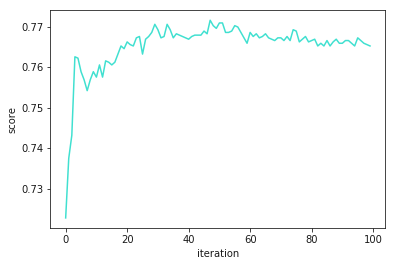

In [239]:
scores = pd.DataFrame(gb_classifier.staged_predict(X_test)).T.apply(lambda x: accuracy_score(y_test, x), axis=0)
print(scores.tail())
scores.plot(color='turquoise')
plt.xlabel('iteration')
plt.ylabel('score');

#### Scores after tuning

595    0.793645
596    0.793980
597    0.792977
598    0.793645
599    0.793645
dtype: float64


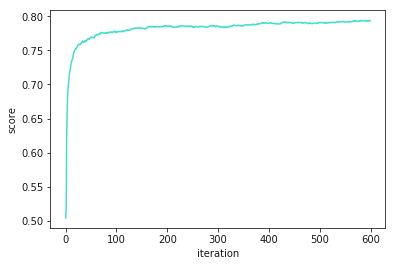

In [240]:
scores = pd.DataFrame(gbm_tuned_2.staged_predict(X_test)).T.apply(lambda x: accuracy_score(y_test, x), axis=0)
print(scores.tail())
scores.plot(color='turquoise')
plt.xlabel('iteration')
plt.ylabel('score');

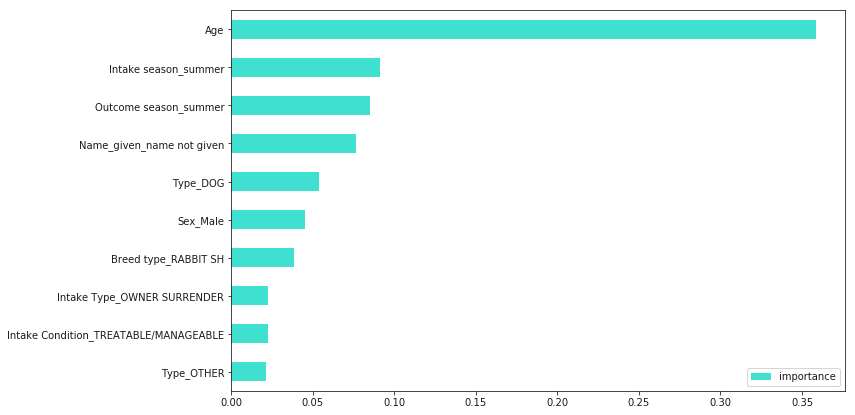

In [241]:
pd.DataFrame(gb_classifier.feature_importances_,
             columns=['importance'], 
             index = X.columns
            ).sort_values(by='importance', ascending=True
            ).tail(10).plot(kind='barh', figsize=(11, 7), color='turquoise');

In [242]:
probabilities = gbm_tuned_2.predict_proba(X_test)
cmap = ListedColormap(sns.color_palette("husl",3))

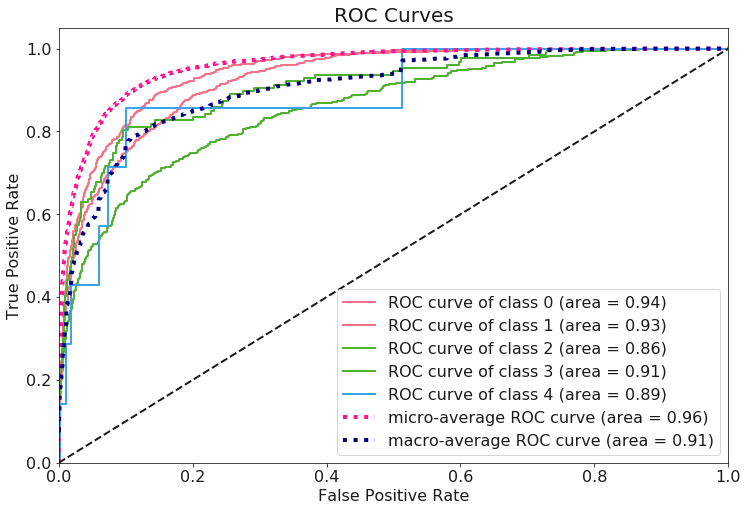

In [243]:
skplt.metrics.plot_roc(y_test, probabilities, plot_micro=True, plot_macro=True,
                       title_fontsize=20, text_fontsize=16, figsize=(12,8), cmap=cmap)

plt.show()

_Both the Adaboost and Gradient Boosting method reached a similar and quite good score, but little lower the in the case of using Random forest or Decesion tree for the evaluation. Both boosting algorithm evaluates well the Euthanise, Adoption and Return to owner outcomes_ 

__Summary of the feature importances__

In [246]:
importances_sum = pd.DataFrame(list(zip( classifier3.feature_importances_, rf_classifier.feature_importances_, 
                                    gb_classifier.feature_importances_, classifier_adab.feature_importances_)),
                           index=X.columns, columns=['Decision tree importance', 'Random forest importance', 
                                                     'Gradient boosting importance',
                                                     'AdaBoost importance']).sort_values('Gradient boosting importance', 
                            ascending=True).tail(20)
importances_sum

,Decision tree importance,Random forest importance,Gradient boosting importance,AdaBoost importance
Size_X-LRG,0.000488,0.001157,0.005293,0.000000
Intake Subtype_COMM CAT,0.016267,0.004767,0.005860,0.001884
Intake Condition_TREATABLE/REHAB,0.010342,0.018596,0.006879,0.008090
Intake day,0.026147,0.053832,0.007759,0.008896
Sex_Spayed,0.009833,0.026289,0.008458,0.007069
Simple color_BROWN,0.003528,0.005171,0.008644,0.000000
Simple color_BROWN mixed color,0.003681,0.008622,0.010470,0.005526
Simple color_FAWN mixed color,0.001079,0.001346,0.013684,0.000000
Intake Subtype_OVER THE COUNTER,0.022249,0.027706,0.015918,0.008541
Outcome day,0.039591,0.061879,0.016307,0.094281


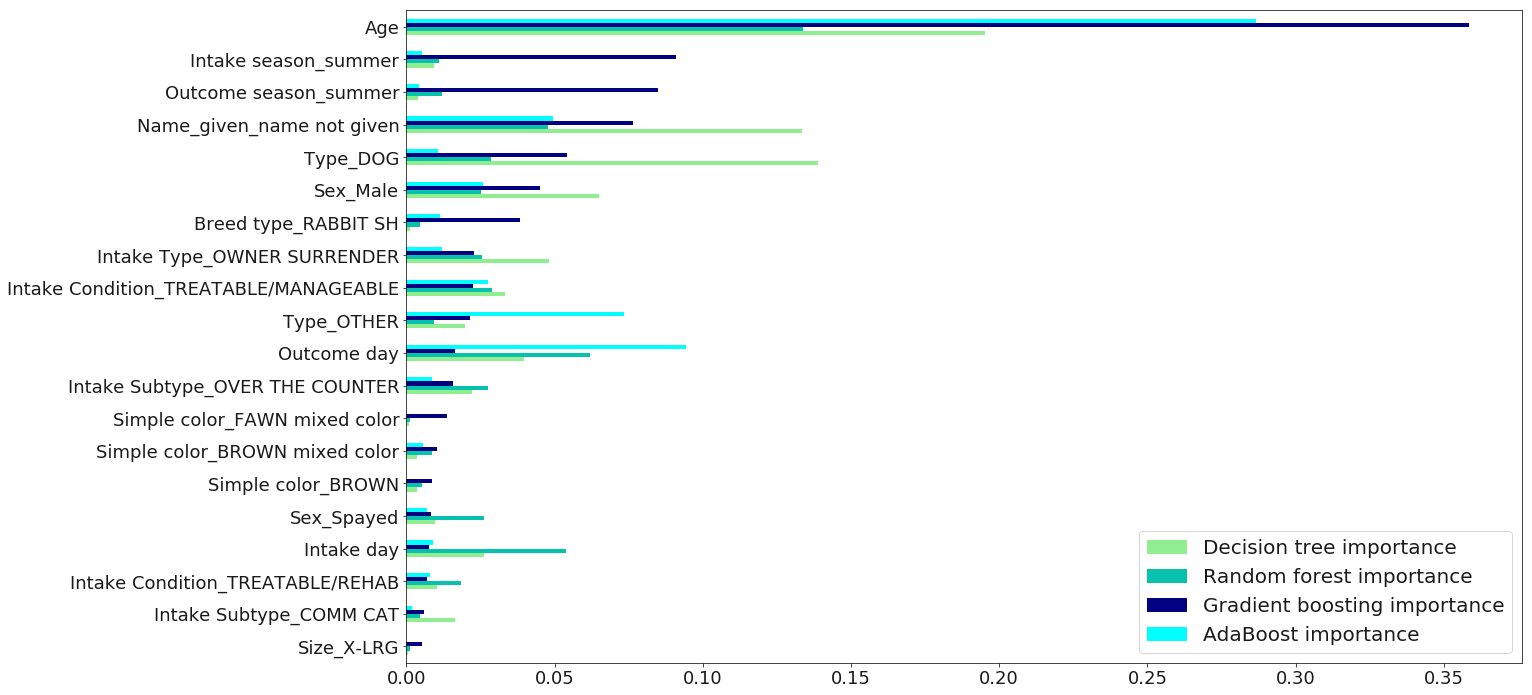

In [247]:
fig, ax = plt.subplots(figsize=(20, 12))
importances_sum.plot(kind='barh', ax=ax, fontsize=18,  color=['lightgreen', 'xkcd:turquoise','navy','aqua','turquoise', 'azure'])
plt.legend(fontsize=20)
plt.show()

__Questions?__


__Ideas__